# DS Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bz2
import datetime as dt

%matplotlib inline

## Exercise 1

• Count the number of lines in Python for each file

Cargar 1000 filas del dataset para explorarlo:

In [2]:
bookings = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', nrows = 1000)
bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [3]:
bookings.shape

(1000, 38)

Leer solo una de las columnas para contar el número de filas:

In [5]:
bookings = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', usecols = ['source'])
bookings.shape

(10000010, 1)

### Solución:

In [9]:
print(f'El archivo tiene: {bookings.shape[0]} filas')

El archivo tiene: 10000010 filas


## Exercise 2

Top 10 arrival airports in the world in 2013 (using the bookings file)

• Arrival airport is the column arr_port. It is the IATA code for the airport  
• To get the total number of passengers for an airport, you can sum the column
pax, grouping by arr_port. Note that there is negative pax. That corresponds to
cancelations. So to get the total number of passengers that have actually
booked, you should sum including the negatives (that will remove the canceled
bookings).  
• Print the top 10 arrival airports in the standard output, including the number of
passengers.  
• Bonus point: Get the name of the city or airport corresponding to that airport
(programatically, we suggest to have a look at GeoBases in Github)  
• Bonus point: Solve this problem using pandas (instead of any other approach)  

Pruebas con una parte del archivo:

In [11]:
bookings = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', nrows = 1000)
bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [13]:
bookings.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [ ]:
# Aunque funciona, no ejecutar las siguientes celdas

# Cargamos las 3 columnas que necesitamos para el top 10 de aeropuertos en pasajeros

bookings_filter = pd.read_csv('bookings.csv.bz2', 
                              compression = 'bz2', sep = '^', 
                              usecols = ['year', 'arr_port','pax'])
bookings_filter.head()

In [ ]:
bookings_filter.info()

In [ ]:
bookings_filter.describe()

In [ ]:
# Solo existen datos de 2013

bookings_filter.nunique()

In [ ]:
bookings_filter.isnull().sum()

In [ ]:
bookings_filter.dropna()

In [ ]:
bookings_filter.shape

In [ ]:
df = bookings_filter.groupby(['year', 'arr_port'])[['pax']].sum()
df.head()

In [ ]:
df_top = df.sort_values('pax', ascending = False)
df_top.head(10)

Pruebas con `chunksize`, la mejor forma de resolverlo:

In [19]:
size = 10000

df_chunk = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', chunksize=size,
                       usecols=['arr_port', 'pax', 'year'])

all_chunk = pd.DataFrame()

for i, b in enumerate(df_chunk):
    print(i, len(b))
    b = b.dropna()
    result_chunk = b.groupby(['year', 'arr_port'])[['pax']].sum()
    all_chunk = all_chunk.append(result_chunk)
    if i>2:
        break
    
all_chunk.head()

0 10000
1 10000
2 10000
3 10000


pax
year arr_port     
2013 AAL         0
     ABQ        12
     ABV         2
     ABZ        -6
     ACC         4

### Solución:

In [20]:
size = 1000000

df_chunk = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', chunksize=size,
                       usecols=['arr_port', 'pax', 'year'])

all_chunk = pd.DataFrame()

for i, b in enumerate(df_chunk):
    print(i, len(b))
    b = b.dropna()
    result_chunk = b.groupby(['year', 'arr_port'])[['pax']].sum()
    all_chunk = all_chunk.append(result_chunk)
    
all_chunk.head()

0 1000000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 10


pax
year   arr_port       
2013.0 AAB         3.0
       AAE        81.0
       AAL        81.0
       AAN         2.0
       AAQ       165.0

In [22]:
# Reset index

df = all_chunk.groupby(['year', 'arr_port'])[['pax']].sum().reset_index()
df.head()

,year,arr_port,pax
0,2013.0,AAB,30.0
1,2013.0,AAE,810.0
2,2013.0,AAL,810.0
3,2013.0,AAN,20.0
4,2013.0,AAQ,1650.0


In [23]:
# Top 10

df_top = df.sort_values('pax', ascending = False)
df_top.head(10)

,year,arr_port,pax
1088,2013.0,LHR,88809.0
1190,2013.0,MCO,70930.0
1050,2013.0,LAX,70530.0
1047,2013.0,LAS,69630.0
886,2013.0,JFK,66270.0
315,2013.0,CDG,64490.0
216,2013.0,BKK,59460.0
1228,2013.0,MIA,58150.0
1719,2013.0,SFO,58000.0
517,2013.0,DXB,55590.0


In [24]:
# Columna Pax a entero y eliminar columna 'year'

df_top[['pax']] = df_top[['pax']].astype(int)
df_top = df_top.drop(['year'], axis = 1)
df_top.head(10) # Solución top 10

,arr_port,pax
1088,LHR,88809
1190,MCO,70930
1050,LAX,70530
1047,LAS,69630
886,JFK,66270
315,CDG,64490
216,BKK,59460
1228,MIA,58150
1719,SFO,58000
517,DXB,55590


## Exercise 3

Plot the monthly number of searches for
flights arriving at Málaga, Madrid or
Barcelona:  
• For the arriving airport, you can use the
Destination column in the searches file.  
• Plot a curve for Málaga, another one for
Madrid, and another one for Barcelona, in
the same figure.  
• Bonus point: Solving this problem using
pandas (instead of any other approach)  

Exploración y pruebas con una parte del dataset:

In [25]:
searches = pd.read_csv('searches.csv.bz2', compression = 'bz2', sep = '^', nrows = 100000)
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [26]:
searches.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [27]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
Date                 100000 non-null object
Time                 100000 non-null object
TxnCode              100000 non-null object
OfficeID             100000 non-null object
Country              99985 non-null object
Origin               100000 non-null object
Destination          100000 non-null object
RoundTrip            100000 non-null int64
NbSegments           100000 non-null int64
Seg1Departure        100000 non-null object
Seg1Arrival          100000 non-null object
Seg1Date             99605 non-null object
Seg1Carrier          37841 non-null object
Seg1BookingCode      10777 non-null object
Seg2Departure        72141 non-null object
Seg2Arrival          72141 non-null object
Seg2Date             71678 non-null object
Seg2Carrier          26819 non-null object
Seg2BookingCode      9272 non-null object
Seg3Departure        5174 non-null object
Seg3Arrival          517

In [28]:
searches['Destination'].unique()

array(['AUH', 'MIL', 'SFO', ..., 'TMB', 'JNG', 'MQN'], dtype=object)

Extraer el mes en una nueva columna:

In [29]:
# Campo 'Date' a formato 'datetime'

searches['Date'] = pd.to_datetime(searches['Date'])
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [37]:
searches[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
Date    100000 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 781.3 KB


In [31]:
# Extraer el mes

searches['Month'] = searches['Date'].dt.month 
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Month
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,1
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,1
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,1
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,1
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,1


In [32]:
# Campo auxiliar para sumar posteriormente

searches['Count'] = 1
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Month,Count
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,1,1
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,1,1
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,1,1
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,1,1
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,1,1


In [33]:
# Sumar por mes todas las búsquedas de la muestra

curve = searches.groupby(['Month'])[['Count']].sum()
curve

,Count
Month,
1,31000
2,28000
3,31000
4,10000


In [34]:
sns.set_style(style = 'darkgrid')

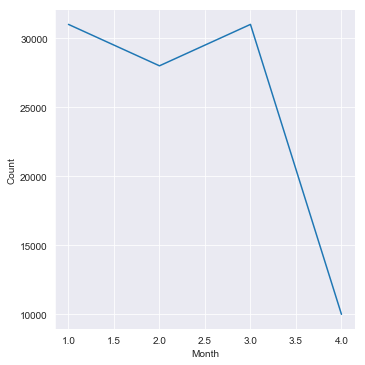

In [35]:
sns.relplot(data = curve, x ='Month', 
                         y = 'Count', 
                         kind = 'line')

### Solución

In [38]:
size = 1000000
airports = ['MAD', 'BCN', 'AGP']

df_chunk = pd.read_csv('searches.csv.bz2', compression = 'bz2', sep = '^', chunksize=size,
                      usecols=['Date', 'Destination'])

all_chunk = pd.DataFrame()

for i, b in enumerate(df_chunk):
    print(i, len(b))
    b['Date'] = pd.to_datetime(b['Date'], errors = 'coerce') # Evitar una fila errónea
    b['Month'] = b['Date'].dt.month # Extracción del mes
    b['Count'] = 1 # Campo auxiliar
    b = b[b['Destination'].isin(airports)] # Filtro de los 3 aeropuertos
    result_chunk = b.groupby(['Destination','Month'])[['Count']].sum()
    all_chunk = all_chunk.append(result_chunk)
    
all_chunk.head(10)

0 1000000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 1000000
11 1000000
12 1000000
13 1000000
14 1000000
15 1000000
16 1000000
17 1000000
18 1000000
19 1000000
20 390198


Count
Destination Month       
AGP         1.0      507
            2.0      441
            3.0      561
            4.0      435
            5.0      570
            6.0      417
            7.0      468
            8.0      414
            9.0      429
            10.0     271

In [39]:
result = all_chunk.groupby(['Destination','Month'])[['Count']].sum().reset_index()
result.head()

,Destination,Month,Count
0,AGP,1.0,9633
1,AGP,2.0,8379
2,AGP,3.0,10659
3,AGP,4.0,8265
4,AGP,5.0,10830


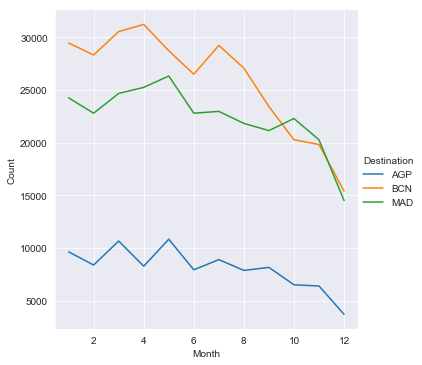

In [40]:
sns.relplot(data = result, x ='Month', 
                         y = 'Count', 
                         kind = 'line',
                         hue = 'Destination')

# Exercise 4

Match searches with bookings:  
• For every search in the searches file, find out whether
the search ended up in a booking or not (using the info
in the bookings file). For instance, search and booking
origin and destination should match.  
• For the bookings file, origin and destination are the
columns dep_port and arr_port, respectively.  
• Generate a CSV file with the search data, and an
additional field, containing 1 if the search ended up in
a booking, and 0 otherwise.  

In [53]:
searches = pd.read_csv('searches.csv.bz2', compression = 'bz2', sep = '^', nrows = 100000,
                      usecols =  ['Date', 'Origin', 'Destination'], low_memory = False, dtype = str)
searches.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [54]:
searches.columns

Index(['Date', 'Origin', 'Destination'], dtype='object')

In [55]:
bookings = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', nrows = 100000,
                      usecols =  ['cre_date           ', 'dep_port', 'arr_port'], low_memory = False, dtype = str)
bookings.head()

,cre_date,dep_port,arr_port
0,2013-02-22 00:00:00,ZRH,LHR
1,2013-03-26 00:00:00,SAL,CLT
2,2013-03-26 00:00:00,SAL,CLT
3,2013-03-26 00:00:00,AKL,SVO
4,2013-03-26 00:00:00,AKL,SVO


In [56]:
bookings.columns

Index(['cre_date           ', 'dep_port', 'arr_port'], dtype='object')

Limpiar duplicados en bookings:

In [60]:
size = 500000

df_chunk = pd.read_csv('bookings.csv.bz2', compression = 'bz2', sep = '^', chunksize=size,
                      low_memory = False, dtype = str)

bookings_clean = pd.DataFrame()

for i, chunk in enumerate(df_chunk):
    print(i, len(bookings_clean))
    bookings_clean = bookings_clean.append(chunk)
    bookings_clean.drop_duplicates(inplace = True)

bookings_clean.columns = bookings_clean.columns.str.strip() # Limpiar espacios de columnas
    
bookings_clean.head()

0 0
1 500000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 1000000
11 1000003
12 1000003
13 1000003
14 1000003
15 1000003
16 1000003
17 1000003
18 1000003
19 1000003
20 1000003


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [61]:
bookings_clean.shape

(1000003, 38)

In [62]:
bookings_clean.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [70]:
bookings_filtered = bookings_clean[['cre_date', 'dep_port', 'arr_port']]
bookings_filtered.head()

,cre_date,dep_port,arr_port
0,2013-02-22 00:00:00,ZRH,LHR
1,2013-03-26 00:00:00,SAL,CLT
2,2013-03-26 00:00:00,SAL,CLT
3,2013-03-26 00:00:00,AKL,SVO
4,2013-03-26 00:00:00,AKL,SVO


In [71]:
bookings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000003 entries, 0 to 5000008
Data columns (total 3 columns):
cre_date    1000003 non-null object
dep_port    1000003 non-null object
arr_port    1000003 non-null object
dtypes: object(3)
memory usage: 30.5+ MB


In [73]:
bookings_filtered.shape

(1000003, 3)

In [74]:
bookings_filtered['cre_date'] = pd.to_datetime(bookings_filtered['cre_date'], errors = 'coerce')
bookings_filtered.head()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cre_date,dep_port,arr_port
0,2013-02-22,ZRH,LHR
1,2013-03-26,SAL,CLT
2,2013-03-26,SAL,CLT
3,2013-03-26,AKL,SVO
4,2013-03-26,AKL,SVO


In [75]:
bookings_filtered.shape

(1000003, 3)

In [79]:
bookings_filtered[['cre_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000003 entries, 0 to 5000008
Data columns (total 1 columns):
cre_date    1000001 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.3 MB
